In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

# model evalution matrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
from sklearn.metrics import ConfusionMatrixDisplay

#models
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#visualising data pipline
from sklearn import set_config

set_config(display='diagram')

######  importing data

In [2]:
df=pd.read_csv("BankChurners_edited.csv")

In [3]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
cols_to_drop=['Gender','Income_Category','Education_Level','Marital_Status','Card_Category','Customer_Age','Months_on_book','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1']

In [5]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [6]:
df.head()

,Attrition_Flag,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,3,5,1,3,12691.0,777,1144,42,1.625,0.061
1,Existing Customer,5,6,1,2,8256.0,864,1291,33,3.714,0.105
2,Existing Customer,3,4,1,0,3418.0,0,1887,20,2.333,0.000
3,Existing Customer,4,3,4,1,3313.0,2517,1171,20,2.333,0.760
4,Existing Customer,3,5,1,0,4716.0,0,816,28,2.500,0.000


In [7]:
X=df.drop(columns=["Attrition_Flag"])
y=df.Attrition_Flag

In [8]:
X.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3,5,1,3,12691.0,777,1144,42,1.625,0.061
1,5,6,1,2,8256.0,864,1291,33,3.714,0.105
2,3,4,1,0,3418.0,0,1887,20,2.333,0.000
3,4,3,4,1,3313.0,2517,1171,20,2.333,0.760
4,3,5,1,0,4716.0,0,816,28,2.500,0.000


In [9]:
y.head()

0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

###### label transformation

In [10]:
y.replace(["Existing Customer","Attrited Customer"],[0,1],inplace=True)

In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

###### train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [33]:
X_train.head(2)

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9066,1,1,3,3,3723.0,1728,8554,99,0.678,0.464
5814,4,1,4,3,5396.0,1803,2107,39,0.393,0.334


# Baseline Model 

## Naive Bayes 

In [143]:
nb_pipe=make_pipeline(MinMaxScaler(),MultinomialNB())

In [144]:
nb_pipe.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

In [145]:
y_nb=nb_pipe.predict(X_test)

In [146]:
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1699
           1       0.00      0.00      0.00       327

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [14]:
log_regression=LogisticRegression(max_iter=500,random_state=42)

In [15]:
log_pipe=make_pipeline(StandardScaler(),log_regression)

In [16]:
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [17]:
y_test_log=log_pipe.predict(X_test)

In [20]:
print(classification_report(y_test,y_test_log))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1699
           1       0.76      0.52      0.62       327

    accuracy                           0.90      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



<Figure size 300x300 with 0 Axes>

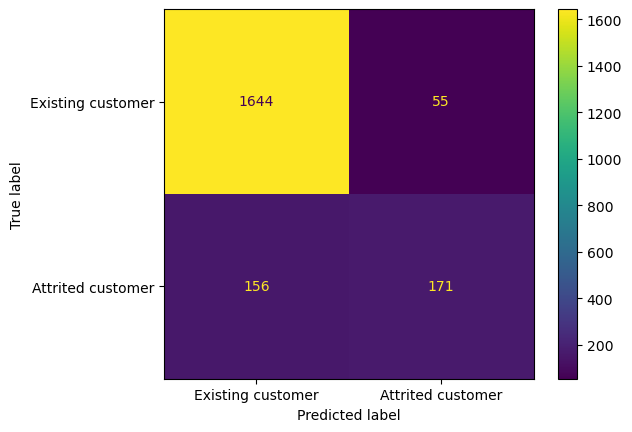

In [23]:
plt.figure(figsize=(3,3))

display=ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_log),display_labels=["Existing customer","Attrited customer"])
display.plot()

## Decision Tree

In [25]:
decision_pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier())
decision_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [26]:
decision_pipe.fit(X_train,y_train)
y_test_dt=decision_pipe.predict(X_test)
confusion_matrix(y_test,y_test_dt)

array([[1614,   85],
       [  75,  252]], dtype=int64)

In [27]:
print(classification_report(y_test,y_test_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1699
           1       0.75      0.77      0.76       327

    accuracy                           0.92      2026
   macro avg       0.85      0.86      0.86      2026
weighted avg       0.92      0.92      0.92      2026



# Imblearn

In [36]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler,NeighbourhoodCleaningRule

## RandomUnderSampler

In [48]:
ros_recall=list()
ros_accuracy=()

### Naive Bayes

In [61]:
nb_pipe=imbpipeline(MinMaxScaler(),RandomOverSampler(),GaussianNB())

TypeError: Pipeline.__init__() takes 2 positional arguments but 4 were given

In [60]:
nb_pipe.fit(X_train,y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler()' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't

### Logistic regression

In [49]:
ros_log_pipe=imbpipeline(steps=[
    ("StandardScaler",StandardScaler()),
    ('ros',RandomOverSampler()),
    ('logistic',LogisticRegression())
])
ros_log_pipe

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('ros', RandomOverSampler()),
                ('logistic', LogisticRegression())])

In [51]:
ros_log_pipe.fit(X_train,y_train)
y_ros_log=ros_log_pipe.predict(X_test)

In [52]:
confusion_matrix(y_test,y_ros_log)

array([[1446,  253],
       [  54,  273]], dtype=int64)

In [53]:
print(classification_report(y_test,y_ros_log))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1699
           1       0.52      0.83      0.64       327

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



In [57]:
ros_recall=ros_recall.append(recall_score(y_test,ros_log_pipe.predict(X_test).round(2))

0.83

### SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()

In [43]:
smote_log_pipeline=imbpipeline(steps=[
    ("StandardScaler",StandardScaler()),
    ('smote',SMOTE()),
    ('logistic',LogisticRegression(max_iter=2000))
])
smote_log_pipeline

Pipeline(steps=[('StandardScaler', StandardScaler()), ('smote', SMOTE()),
                ('logistic', LogisticRegression(max_iter=2000))])

In [44]:
smote_log_pipeline.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()), ('smote', SMOTE()),
                ('logistic', LogisticRegression(max_iter=2000))])

In [45]:
y_test_log_smote=smote_log_pipeline.predict(X_test)

In [46]:
confusion_matrix(y_test,y_test_log_smote)

array([[1451,  248],
       [  55,  272]], dtype=int64)

In [47]:
print(classification_report(y_test,y_test_log_smote))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91      1699
           1       0.52      0.83      0.64       327

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



## Hybrid Sampling

In [90]:
from imblearn.combine import SMOTEENN,SMOTETomek

In [92]:
recall_smoteenn=list()
recall_smotetomel=list()

### SMOTEENN

#### Naive Bayes

In [123]:
mnb_smoteenn_pipe=imbpipeline(steps=[
    ("MinMaxScaler",MinMaxScaler()),
    ('smoteenn',SMOTEENN()),
    ('MultinomialNB',MultinomialNB())
])

In [124]:
mnb_smoteenn_pipe.fit(X_train,y_train)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('smoteenn', SMOTEENN()),
                ('MultinomialNB', MultinomialNB())])

In [125]:
print(classification_report(y_test,mnb_smoteenn_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1699
           1       0.25      0.80      0.38       327

    accuracy                           0.59      2026
   macro avg       0.59      0.67      0.54      2026
weighted avg       0.82      0.59      0.64      2026



#### Logistic Regresion

In [127]:
log_smoteenn_pipe=imbpipeline(steps=[
    ("StandardScaler",StandardScaler()),
    ('smoteenn',SMOTEENN()),
    ('LogisticRegression',LogisticRegression())
])

In [128]:
log_smoteenn_pipe.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('LogisticRegression', LogisticRegression())])

In [129]:
print(classification_report(y_test,log_smoteenn_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1699
           1       0.47      0.86      0.61       327

    accuracy                           0.82      2026
   macro avg       0.72      0.84      0.75      2026
weighted avg       0.89      0.82      0.84      2026



####  Decision Tree

In [130]:
dt_smoteenn_pipe=imbpipeline(steps=[
    ("StandardScaler",StandardScaler()),
    ('smoteenn',SMOTEENN()),
    ('Decision Tree',DecisionTreeClassifier())
])
dt_smoteenn_pipe

Pipeline(steps=[('StandardScaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('Decision Tree', DecisionTreeClassifier())])

In [131]:
dt_smoteenn_pipe.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('Decision Tree', DecisionTreeClassifier())])

In [132]:
print(classification_report(y_test,smoteenn_dt_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1699
           1       0.63      0.86      0.73       327

    accuracy                           0.90      2026
   macro avg       0.80      0.88      0.83      2026
weighted avg       0.92      0.90      0.90      2026



### SMOTETomek

#### Naive Bayes

In [133]:
mnb_smotetomek_pipe=imbpipeline(steps=[
    ("MinMaxScaler",MinMaxScaler()),
    ('smotetomek',SMOTETomek()),
    ('MultinomialNB',MultinomialNB())
])

In [134]:
mnb_smotetomek_pipe.fit(X_train,y_train)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('smotetomek', SMOTETomek()),
                ('MultinomialNB', MultinomialNB())])

In [135]:
print(classification_report(y_test,mnb_smotetomek_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1699
           1       0.33      0.70      0.45       327

    accuracy                           0.73      2026
   macro avg       0.63      0.72      0.64      2026
weighted avg       0.83      0.73      0.76      2026



#### Logistic Regression

In [136]:
log_smotetomek_pipe=imbpipeline(steps=[
    ("StandardScaler",StandardScaler()),
    ('SMOTETomek',SMOTETomek()),
    ('LogisticRegression',LogisticRegression())
])
log_smotetomek_pipe

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SMOTETomek', SMOTETomek()),
                ('LogisticRegression', LogisticRegression())])

In [137]:
log_smotetomek_pipe.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SMOTETomek', SMOTETomek()),
                ('LogisticRegression', LogisticRegression())])

In [138]:
print(classification_report(y_test,log_smotetomek_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1699
           1       0.53      0.83      0.64       327

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



#### Decision Tree

In [139]:
dt_smotetomek_pipe=imbpipeline(steps=[
    ("StandardScaler",StandardScaler()),
    ('SMOTETomek',SMOTETomek()),
    ('DecisionTreeClassifier',DecisionTreeClassifier())
])

In [140]:
dt_smotetomek_pipe.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SMOTETomek', SMOTETomek()),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [142]:
print(classification_report(y_test,dt_smotetomek_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1699
           1       0.72      0.80      0.76       327

    accuracy                           0.92      2026
   macro avg       0.84      0.87      0.85      2026
weighted avg       0.92      0.92      0.92      2026

